# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
# read the data
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv")

s = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California",
     "CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia",
     "HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas",
     "KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts",
     "MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana",
     "NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico",
     "NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma",
     "OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota",
     "TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington",
     "WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
# Print the data
print(df.head(10))

   storenum OPENDATE date_super  conversion  st  county  \
0         1   7/1/62     3/1/97         1.0   5       7   
1         2   8/1/64     3/1/96         1.0   5       9   
2         4   8/1/65     3/1/02         1.0   5       7   
3         8  10/1/67     3/1/93         1.0   5      29   
4         7  10/1/67        NaN         NaN   5     119   
5        10   7/1/68     3/1/98         1.0  40      21   
6        13  11/1/68     3/1/96         1.0  29      97   
7        12   7/1/68     3/1/94         1.0  40     131   
8        11   3/1/68    2/20/02         1.0   5       5   
9         9   3/1/68     3/1/00         1.0  29     143   

               STREETADDR            STRCITY STRSTATE  ZIPCODE   type_store  \
0        2110 WEST WALNUT             Rogers       AR    72756  Supercenter   
1        1417 HWY 62/65 N           Harrison       AR    72601  Supercenter   
2       2901 HWY 412 EAST     Siloam Springs       AR    72761  Supercenter   
3   1621 NORTH BUSINESS 9         

#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [7]:
states_s,storess = tuple(df[df["type_store"]=="Supercenter"].groupby("STRSTATE").agg("count")["storenum"].sort_values(ascending=False).reset_index().iloc[6,:])
print(f'The state {s[states_s]}("{states_s}") with {storess} superstores has the 7th highest total number of Walmart superstores ')


states_s,storess = tuple(df.groupby("STRSTATE").agg("count")["storenum"].sort_values(ascending=False).reset_index().iloc[4,:])
print(f'The state {s[states_s]}("{states_s}") with {storess} superstores has the 5th highest total number of Walmart stores(Both superstores and regular stores) ')


The state Alabama("AL") with 76 superstores has the 7th highest total number of Walmart superstores 
The state Ohio("OH") with 124 superstores has the 5th highest total number of Walmart stores(Both superstores and regular stores) 


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [3]:
# Your answer to Graded Task 3 here:

def cumulative(df,state):
  check_df = df.copy()
  # Converting state to datetime
  check_df["OPENDATE"] = pd.to_datetime(check_df["OPENDATE"],format="%m/%d/%y")
    
  # Calibrate date to appropriate date range
  check_df["OPENDATE"] = check_df["OPENDATE"].apply(lambda x:x if x.year<=2021 else x-relativedelta(years=100))
# return cummulative sum by grouping the dates, getting the counts and take cummulative sum out of it
  return check_df[check_df["STRSTATE"]==state].groupby("OPENDATE")["storenum"].agg("count").cumsum()

IN =input(" ENTER THE STATE NAME THAT YOU WANT TO FIND THE CUMULATIVE SUM  ")
res_df = cumulative(df,IN)
print(res_df)



 ENTER THE STATE NAME THAT YOU WANT TO FIND THE CUMULATIVE SUM  AR
OPENDATE
1962-07-01     1
1964-08-01     2
1965-08-01     3
1967-10-01     5
1968-03-01     6
              ..
2003-03-19    77
2004-01-21    78
2004-08-18    79
2004-10-27    80
2005-05-18    81
Name: storenum, Length: 68, dtype: int64


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

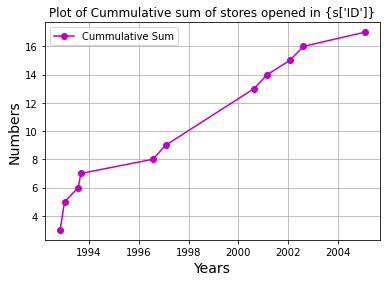

In [4]:

RR = cumulative(df,"ID")
plt.plot(RR,label="Cummulative Sum",color = 'm',marker='o')
plt.xlabel("Years",fontsize=14)
plt.ylabel("Numbers",fontsize=14)
plt.title("Plot of Cummulative sum of stores opened in {s['ID']}")
plt.grid(True)
plt.legend()
plt.show()








#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

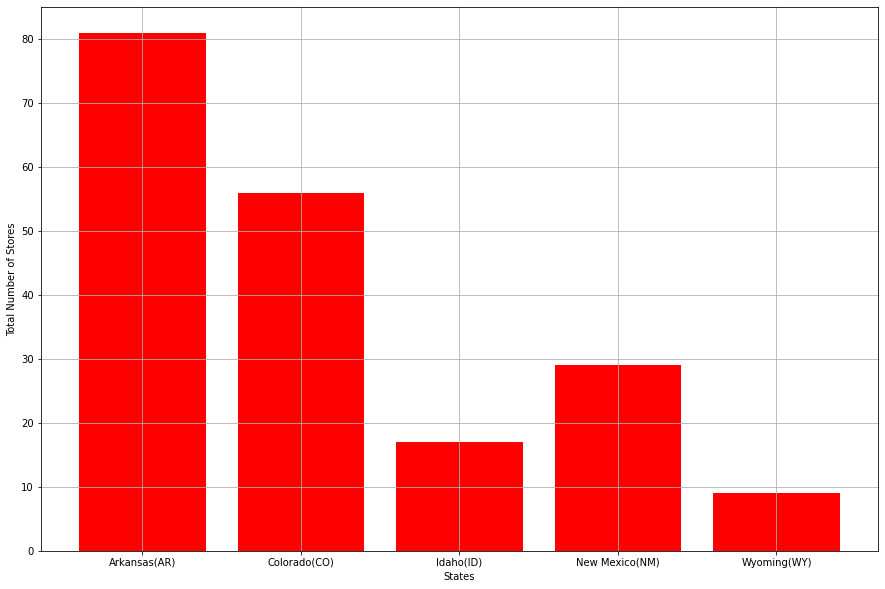

In [5]:

RR = df[(df["STRSTATE"].isin(["ID","NH","AR","WY","NM","CO"]))].groupby("STRSTATE")["storenum"].agg("count")
plt.figure(figsize=(15,10))
plt.bar(list(map(lambda x:s[x]+f'({x})',RR.index)),list(RR),color = 'r')
plt.xlabel("States")
plt.ylabel("Total Number of Stores")
plt.grid(True)
plt.show()